In [1]:
import numpy as np
import h5py
import matplotlib.pyplot as plt
from sklearn import metrics

In [2]:
photon_LL =  np.loadtxt('LL_folder_recEinc/gamma_2.out')

In [3]:
LL_folder = "LL_folder_recEinc/"

In [4]:
#LL_folder_unnorm = "LL_folder_fixeddisp_unnorm/"

In [5]:
lifetime_0_01ns_0_005GeV =  np.loadtxt(LL_folder+'lifetime_0.01ns_0.005GeV.out')
lifetime_0_1ns_0_005GeV =  np.loadtxt(LL_folder+'lifetime_0.1ns_0.005GeV.out')
lifetime_1ns_0_005GeV =  np.loadtxt(LL_folder+'lifetime_1ns_0.005GeV.out')

lifetime_0_01ns_0_05GeV =  np.loadtxt(LL_folder+'lifetime_0.01ns_0.05GeV.out')
lifetime_0_1ns_0_05GeV =  np.loadtxt(LL_folder+'lifetime_0.1ns_0.05GeV.out')
lifetime_1ns_0_05GeV =  np.loadtxt(LL_folder+'lifetime_1ns_0.05GeV.out')

lifetime_0_01ns_0_5GeV =  np.loadtxt(LL_folder+'lifetime_0.01ns_0.5GeV.out')
lifetime_0_1ns_0_5GeV =  np.loadtxt(LL_folder+'lifetime_0.1ns_0.5GeV.out')
lifetime_1ns_0_5GeV =  np.loadtxt(LL_folder+'lifetime_1ns_0.5GeV.out')

lifetime_0_01ns_5GeV =  np.loadtxt(LL_folder+'lifetime_0.01ns_5GeV.out')
lifetime_0_1ns_5GeV =  np.loadtxt(LL_folder+'lifetime_0.1ns_5GeV.out')
lifetime_1ns_5GeV =  np.loadtxt(LL_folder+'lifetime_1ns_5GeV.out')

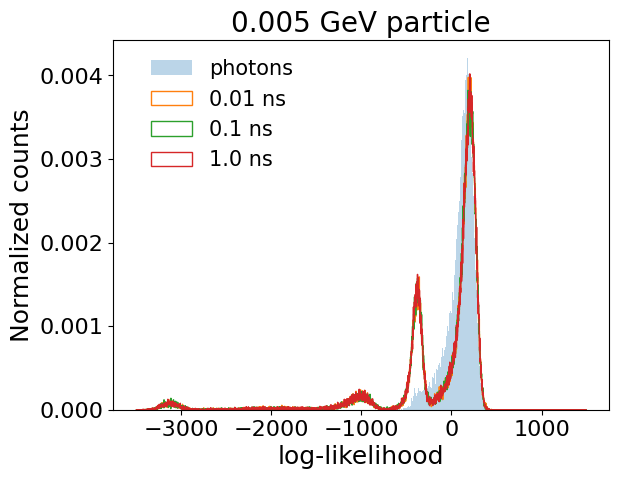

In [7]:
bins = np.linspace(-3500,1500,3000)
_ = plt.hist(photon_LL,bins=bins,label="photons",density=True,alpha=0.3)
_ = plt.hist(lifetime_0_01ns_0_005GeV,bins=bins,histtype='step',label="0.01 ns",density=True)
_ = plt.hist(lifetime_0_1ns_0_005GeV,bins=bins,histtype='step',label="0.1 ns",density=True)
_ = plt.hist(lifetime_1ns_0_005GeV,bins=bins,histtype='step',label="1.0 ns",density=True)
plt.legend(loc='upper right', bbox_to_anchor=(0.4, 1),
          ncol=1, frameon=False, fontsize=15)
plt.title('0.005 GeV particle', fontsize=20)
plt.xlabel('log-likelihood',fontsize=18)
plt.ylabel('Normalized counts',fontsize=18)
plt.tick_params(axis='both', which='major', labelsize=16)

In [8]:
roc = {}
for i in range(3):
    roc[i] = []
n = 0
for data in [lifetime_0_01ns_0_005GeV, lifetime_0_1ns_0_005GeV,lifetime_1ns_0_005GeV]:
    for cut in np.linspace(-3500,500,4000):
        passcut_sig =len(data[data<cut])
        passcut_bg =len(photon_LL[photon_LL<cut])
        roc[n].append([passcut_sig/len(data), passcut_bg/100000])
    n += 1

In [9]:
x = [0, 1]
y = [0, 1]

AUC =  0.5315222235
AUC =  0.53673711195
AUC =  0.5354517321499999


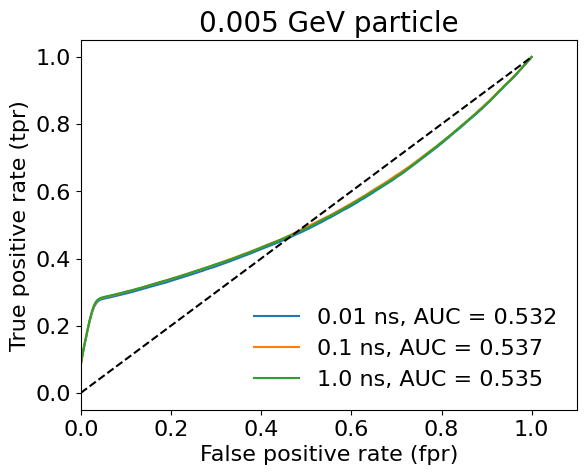

In [10]:
label_str = ["0.01 ns", "0.1 ns", "1.0 ns"]
color = ['orange','g','r']
for i in range(3):
    roc_curve = np.array(roc[i])
    tpr = roc_curve[:,0]
    fpr = roc_curve[:,1]
    auc = metrics.auc(fpr, tpr)
    print("AUC = ", auc)
    label = label_str[i] + ", AUC = "+ str(round(auc,3))
    _ = plt.plot(fpr,tpr, label=label)
    plt.xlabel('False positive rate (fpr)', fontsize=16)
    plt.ylabel('True positive rate (tpr)', fontsize=16)
    plt.legend(fontsize=16,frameon=False)
    plt.title('0.005 GeV particle', fontsize=20)
    plt.tick_params(axis='both', which='major', labelsize=16)
    plt.xlim([0,1.1])
plt.plot(x,y,linestyle="--", c='k')

/tmp/ipykernel_357572/553316595.py:14: RuntimeWarning: divide by zero encountered in divide
  _ = plt.plot(1/fpr, tpr/np.sqrt(fpr), label=label, c = color[i])
/tmp/ipykernel_357572/553316595.py:14: RuntimeWarning: invalid value encountered in divide
  _ = plt.plot(1/fpr, tpr/np.sqrt(fpr), label=label, c = color[i])


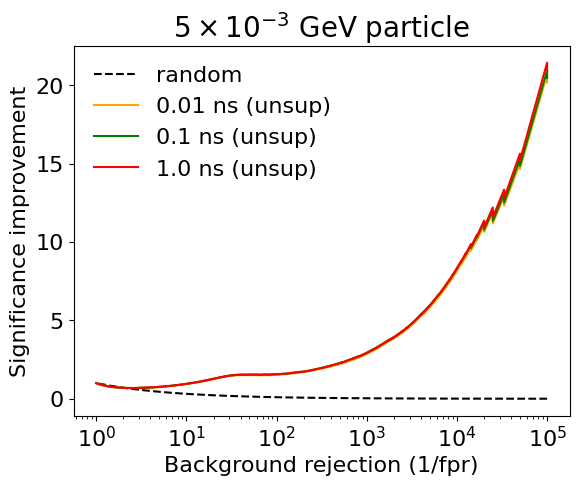

In [12]:
#supervised  = ["lifetime_0.01ns_0.005GeV_sic.txt", "lifetime_0.1ns_0.005GeV_sic.txt", "lifetime_1ns_0.005GeV_sic.txt"]
#supervised_roc  = ["lifetime_0.01ns_0.005GeV_roc.txt", "lifetime_0.1ns_0.005GeV_roc.txt", "lifetime_1ns_0.005GeV_roc.txt"]

label_str = ["0.01 ns (unsup)", "0.1 ns (unsup)", "1.0 ns (unsup)"]
label_str_sup = ["0.01 ns (sup)", "0.1 ns (sup)", "1.0 ns (sup)"]
color = ['orange','g','r']
x = np.logspace(-5,0,100)
_ = plt.plot(1/x, x/np.sqrt(x), label="random", c = 'k', linestyle = '--')
for i in range(3):
    roc_curve = np.array(roc[i])
    tpr = roc_curve[:,0]
    fpr = roc_curve[:,1]
    label = label_str[i]
    _ = plt.plot(1/fpr, tpr/np.sqrt(fpr), label=label, c = color[i])

    #sup = np.loadtxt(supervised[i])
    #sup_roc = np.loadtxt(supervised_roc[i])
    label_sup = label_str_sup[i]
    #_ = plt.plot(sup[0,:], sup[1,:], label=label_sup, c = color[i], linestyle='dashdot')
    #_ = plt.plot(1/sup_roc[0,:], sup_roc[1,:]/np.sqrt(sup_roc[0,:]), label=label_sup, c = color[i], linestyle='dotted')
    plt.ylabel('Significance improvement', fontsize=16)
    #plt.xlabel('Signal efficiency (tpr)', fontsize=16)
    plt.xlabel('Background rejection (1/fpr)', fontsize=16)
    plt.legend(fontsize=16,frameon=False)
    plt.title(r'$5\times 10^{-3}$ GeV particle', fontsize=20)
    plt.tick_params(axis='both', which='major', labelsize=16)
    #plt.xlim([0,1.1])
    plt.xscale('log')
    plt.savefig("paper_plots/0_005GeV.png",dpi=300, bbox_inches='tight')

/tmp/ipykernel_357572/1722085693.py:14: RuntimeWarning: divide by zero encountered in divide
  _ = plt.plot(1/fpr, tpr/np.sqrt(fpr), label=label, c = color[i])
/tmp/ipykernel_357572/1722085693.py:14: RuntimeWarning: invalid value encountered in divide
  _ = plt.plot(1/fpr, tpr/np.sqrt(fpr), label=label, c = color[i])
/tmp/ipykernel_357572/1722085693.py:20: RuntimeWarning: divide by zero encountered in divide
  _ = plt.plot(1/sup_roc[0,:], sup_roc[1,:]/np.sqrt(sup_roc[0,:]), label=label_sup, c = color[i], linestyle='dotted')
/tmp/ipykernel_357572/1722085693.py:20: RuntimeWarning: invalid value encountered in divide
  _ = plt.plot(1/sup_roc[0,:], sup_roc[1,:]/np.sqrt(sup_roc[0,:]), label=label_sup, c = color[i], linestyle='dotted')


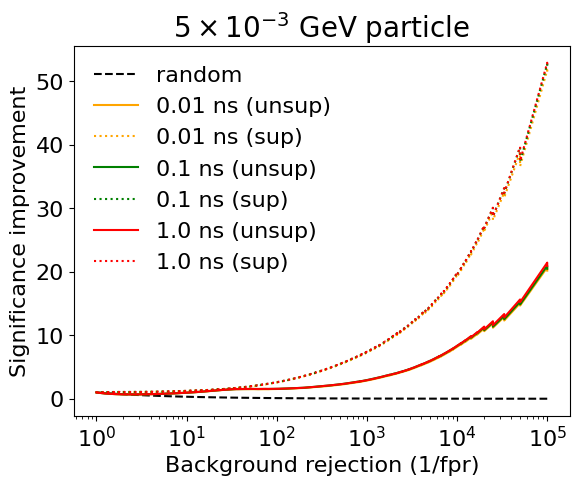

In [13]:
#supervised  = ["lifetime_0.01ns_0.005GeV_sic.txt", "lifetime_0.1ns_0.005GeV_sic.txt", "lifetime_1ns_0.005GeV_sic.txt"]
supervised_roc  = ["lifetime_0.01ns_0.005GeV_roc.txt", "lifetime_0.1ns_0.005GeV_roc.txt", "lifetime_1ns_0.005GeV_roc.txt"]

label_str = ["0.01 ns (unsup)", "0.1 ns (unsup)", "1.0 ns (unsup)"]
label_str_sup = ["0.01 ns (sup)", "0.1 ns (sup)", "1.0 ns (sup)"]
color = ['orange','g','r']
x = np.logspace(-5,0,100)
_ = plt.plot(1/x, x/np.sqrt(x), label="random", c = 'k', linestyle = '--')
for i in range(3):
    roc_curve = np.array(roc[i])
    tpr = roc_curve[:,0]
    fpr = roc_curve[:,1]
    label = label_str[i]
    _ = plt.plot(1/fpr, tpr/np.sqrt(fpr), label=label, c = color[i])

    #sup = np.loadtxt(supervised[i])
    sup_roc = np.loadtxt(supervised_roc[i])
    label_sup = label_str_sup[i]
    #_ = plt.plot(sup[0,:], sup[1,:], label=label_sup, c = color[i], linestyle='dashdot')
    _ = plt.plot(1/sup_roc[0,:], sup_roc[1,:]/np.sqrt(sup_roc[0,:]), label=label_sup, c = color[i], linestyle='dotted')
    plt.ylabel('Significance improvement', fontsize=16)
    #plt.xlabel('Signal efficiency (tpr)', fontsize=16)
    plt.xlabel('Background rejection (1/fpr)', fontsize=16)
    plt.legend(fontsize=16,frameon=False)
    plt.title(r'$5\times 10^{-3}$ GeV particle', fontsize=20)
    plt.tick_params(axis='both', which='major', labelsize=16)
    #plt.xlim([0,1.1])
    plt.xscale('log')
    plt.savefig("paper_plots/0_005GeV_sup.png",dpi=300, bbox_inches='tight')

/tmp/ipykernel_357572/746217449.py:13: RuntimeWarning: divide by zero encountered in divide
  _ = plt.plot(1/fpr, tpr/np.sqrt(fpr), label=label, c = color[i])
/tmp/ipykernel_357572/746217449.py:13: RuntimeWarning: invalid value encountered in divide
  _ = plt.plot(1/fpr, tpr/np.sqrt(fpr), label=label, c = color[i])
/tmp/ipykernel_357572/746217449.py:19: RuntimeWarning: divide by zero encountered in divide
  _ = plt.plot(1/sup_roc[0,:], sup_roc[1,:]/np.sqrt(sup_roc[0,:]), label=label_sup, c = color[i], linestyle='dotted')
/tmp/ipykernel_357572/746217449.py:19: RuntimeWarning: invalid value encountered in divide
  _ = plt.plot(1/sup_roc[0,:], sup_roc[1,:]/np.sqrt(sup_roc[0,:]), label=label_sup, c = color[i], linestyle='dotted')


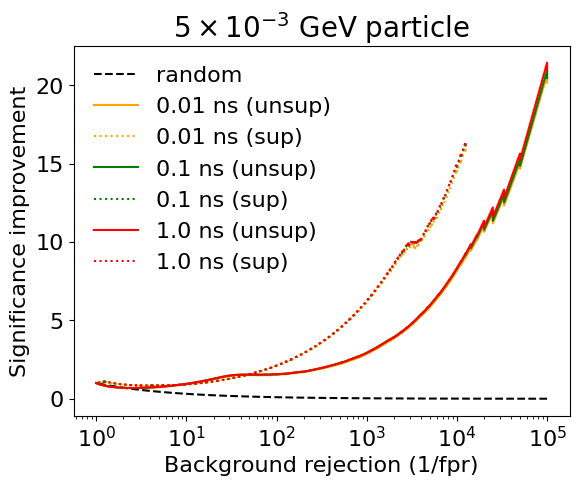

In [14]:
supervised_heavy_roc  = ["lifetime_0.01ns_0.005GeV_heavy_roc.txt", "lifetime_0.1ns_0.005GeV_heavy_roc.txt", "lifetime_1ns_0.005GeV_heavy_roc.txt"]

label_str = ["0.01 ns (unsup)", "0.1 ns (unsup)", "1.0 ns (unsup)"]
label_str_sup = ["0.01 ns (sup)", "0.1 ns (sup)", "1.0 ns (sup)"]
color = ['orange','g','r']
x = np.logspace(-5,0,100)
_ = plt.plot(1/x, x/np.sqrt(x), label="random", c = 'k', linestyle = '--')
for i in range(3):
    roc_curve = np.array(roc[i])
    tpr = roc_curve[:,0]
    fpr = roc_curve[:,1]
    label = label_str[i]
    _ = plt.plot(1/fpr, tpr/np.sqrt(fpr), label=label, c = color[i])

    #sup = np.loadtxt(supervised[i])
    sup_roc = np.loadtxt(supervised_heavy_roc[i])
    label_sup = label_str_sup[i]
    #_ = plt.plot(sup[0,:], sup[1,:], label=label_sup, c = color[i], linestyle='dashdot')
    _ = plt.plot(1/sup_roc[0,:], sup_roc[1,:]/np.sqrt(sup_roc[0,:]), label=label_sup, c = color[i], linestyle='dotted')
    plt.ylabel('Significance improvement', fontsize=16)
    #plt.xlabel('Signal efficiency (tpr)', fontsize=16)
    plt.xlabel('Background rejection (1/fpr)', fontsize=16)
    plt.legend(fontsize=16,frameon=False)
    plt.title(r'$5\times 10^{-3}$ GeV particle', fontsize=20)
    plt.tick_params(axis='both', which='major', labelsize=16)
    #plt.xlim([0,1.1])
    plt.xscale('log')
    plt.savefig("paper_plots/0_005GeV_heavy_sup.png",dpi=300, bbox_inches='tight')

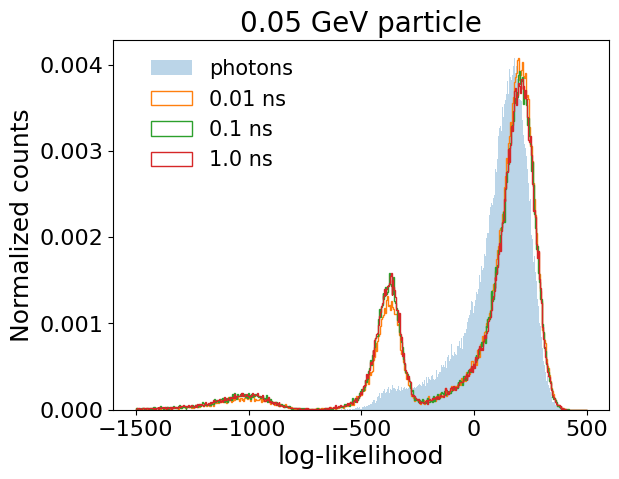

In [15]:
bins = np.linspace(-1500,500,500)
_ = plt.hist(photon_LL,bins=bins,label="photons",density=True,alpha=0.3)
_ = plt.hist(lifetime_0_01ns_0_05GeV,bins=bins,histtype='step',label="0.01 ns",density=True)
_ = plt.hist(lifetime_0_1ns_0_05GeV,bins=bins,histtype='step',label="0.1 ns",density=True)
_ = plt.hist(lifetime_1ns_0_05GeV,bins=bins,histtype='step',label="1.0 ns",density=True)

plt.legend(loc='upper right', bbox_to_anchor=(0.4, 1),
          ncol=1, frameon=False, fontsize=15)
plt.title('0.05 GeV particle', fontsize=20)
plt.xlabel('log-likelihood',fontsize=18)
plt.ylabel('Normalized counts',fontsize=18)
plt.tick_params(axis='both', which='major', labelsize=16)

In [16]:
roc = {}
for i in range(3):
    roc[i] = []
n = 0
for data in [lifetime_0_01ns_0_05GeV, lifetime_0_1ns_0_05GeV,lifetime_1ns_0_05GeV]:
    for cut in np.linspace(-3500,500,4000):
        passcut_sig =len(data[data<cut])
        passcut_bg =len(photon_LL[photon_LL<cut])
        roc[n].append([passcut_sig/len(data), passcut_bg/100000])
    n += 1

In [17]:
x = [0, 1]
y = [0, 1]

AUC =  0.50835896445
AUC =  0.536224326
AUC =  0.5381158634


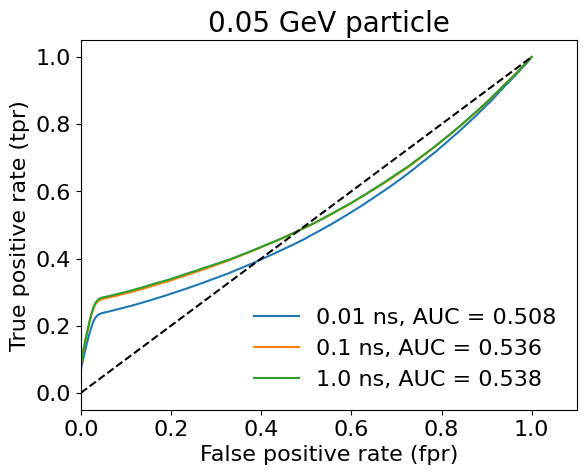

In [18]:
label_str = ["0.01 ns", "0.1 ns", "1.0 ns"]
color = ['orange','g','r']
for i in range(3):
    roc_curve = np.array(roc[i])
    tpr = roc_curve[:,0]
    fpr = roc_curve[:,1]
    auc = metrics.auc(fpr, tpr)
    print("AUC = ", auc)
    label = label_str[i] + ", AUC = "+ str(round(auc,3))
    _ = plt.plot(fpr,tpr, label=label)
    plt.xlabel('False positive rate (fpr)', fontsize=16)
    plt.ylabel('True positive rate (tpr)', fontsize=16)
    plt.legend(fontsize=16,frameon=False)
    plt.title('0.05 GeV particle', fontsize=20)
    plt.tick_params(axis='both', which='major', labelsize=16)
    plt.xlim([0,1.1])
plt.plot(x,y,linestyle="--", c='k')

R30 =  4.8
R30 =  9.0
R30 =  10.2


/tmp/ipykernel_357572/1537144726.py:12: RuntimeWarning: divide by zero encountered in divide
  _ = plt.plot(tpr, 1/fpr, label=label, c = color[i])


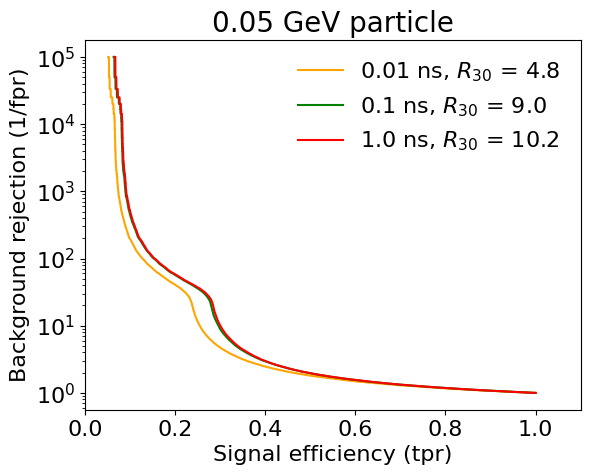

In [19]:
label_str = ["0.01 ns", "0.1 ns", "1.0 ns"]
color = ['orange','g','r']
for i in range(3):
    roc_curve = np.array(roc[i])
    tpr = roc_curve[:,0]
    fpr = roc_curve[:,1]
    #auc = metrics.auc(fpr, tpr)
    fpr_30 = fpr[np.argmin(np.abs(tpr-0.3))]
    R30 = 1/fpr_30
    print("R30 = ", str(round(R30,1)))
    label = label_str[i] + r", $R_{30}$ = "+str(round(R30,1))
    _ = plt.plot(tpr, 1/fpr, label=label, c = color[i])
    plt.ylabel('Background rejection (1/fpr)', fontsize=16)
    plt.xlabel('Signal efficiency (tpr)', fontsize=16)
    plt.legend(fontsize=16,frameon=False)
    plt.title('0.05 GeV particle', fontsize=20)
    plt.tick_params(axis='both', which='major', labelsize=16)
    plt.yscale('log')
    plt.xlim([0,1.1])

/tmp/ipykernel_357572/112653748.py:12: RuntimeWarning: divide by zero encountered in divide
  _ = plt.plot(1/fpr, tpr/np.sqrt(fpr), label=label, c = color[i])
/tmp/ipykernel_357572/112653748.py:12: RuntimeWarning: invalid value encountered in divide
  _ = plt.plot(1/fpr, tpr/np.sqrt(fpr), label=label, c = color[i])


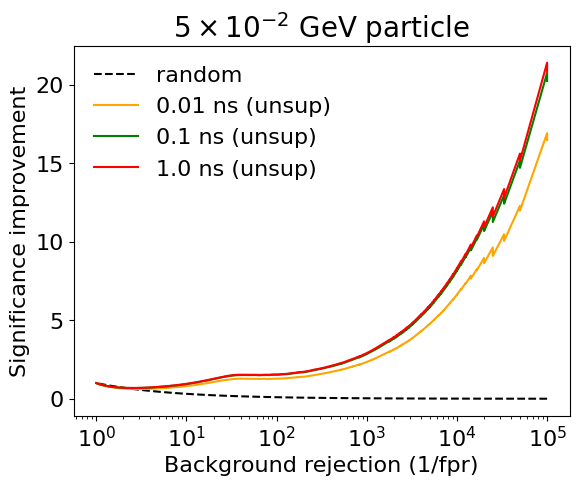

In [22]:
supervised_roc  = ["lifetime_0.01ns_0.05GeV_roc.txt", "lifetime_0.1ns_0.05GeV_roc.txt", "lifetime_1ns_0.05GeV_roc.txt"]
label_str = ["0.01 ns (unsup)", "0.1 ns (unsup)", "1.0 ns (unsup)"]
label_str_sup = ["0.01 ns (sup)", "0.1 ns (sup)", "1.0 ns (sup)"]
color = ['orange','g','r']
x = np.logspace(-5,0,100)
_ = plt.plot(1/x, x/np.sqrt(x), label="random", c = 'k', linestyle = '--')
for i in range(3):
    roc_curve = np.array(roc[i])
    tpr = roc_curve[:,0]
    fpr = roc_curve[:,1]
    label = label_str[i]
    _ = plt.plot(1/fpr, tpr/np.sqrt(fpr), label=label, c = color[i])

    #sup = np.loadtxt(supervised[i])
    sup_roc = np.loadtxt(supervised_roc[i])
    label_sup = label_str_sup[i]
    #_ = plt.plot(sup[0,:], sup[1,:], label=label_sup, c = color[i], linestyle='dashdot')
    #_ = plt.plot(1/sup_roc[0,:], sup_roc[1,:]/np.sqrt(sup_roc[0,:]), label=label_sup, c = color[i], linestyle='dotted')
    plt.ylabel('Significance improvement', fontsize=16)
    #plt.xlabel('Signal efficiency (tpr)', fontsize=16)
    plt.xlabel('Background rejection (1/fpr)', fontsize=16)
    plt.legend(fontsize=16,frameon=False)
    plt.title(r'$5\times 10^{-2}$ GeV particle', fontsize=20)
    plt.tick_params(axis='both', which='major', labelsize=16)
    #plt.xlim([0,1.1])
    plt.xscale('log')
    plt.savefig("paper_plots/0_05GeV.png",dpi=300, bbox_inches='tight')

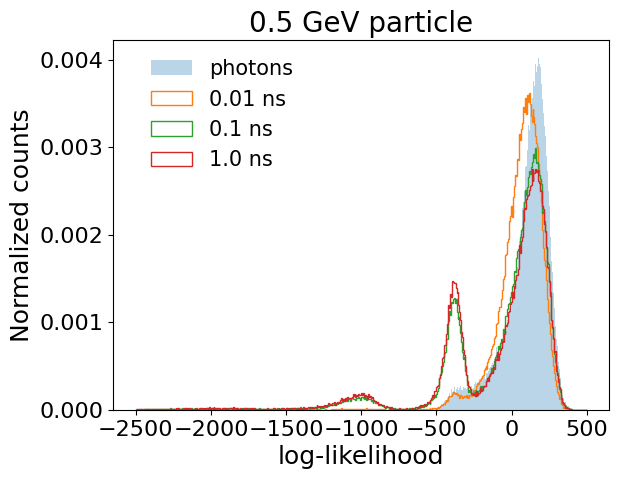

In [23]:
bins = np.linspace(-2500,500,500)
_ = plt.hist(photon_LL,bins=bins,label="photons",density=True,alpha=0.3)
_ = plt.hist(lifetime_0_01ns_0_5GeV,bins=bins,histtype='step',label="0.01 ns",density=True)
_ = plt.hist(lifetime_0_1ns_0_5GeV,bins=bins,histtype='step',label="0.1 ns",density=True)
_ = plt.hist(lifetime_1ns_0_5GeV,bins=bins,histtype='step',label="1.0 ns",density=True)

plt.legend(loc='upper right', bbox_to_anchor=(0.4, 1),
          ncol=1, frameon=False, fontsize=15)
plt.title('0.5 GeV particle', fontsize=20)
plt.xlabel('log-likelihood',fontsize=18)
plt.ylabel('Normalized counts',fontsize=18)
plt.tick_params(axis='both', which='major', labelsize=16)

In [24]:
roc = {}
for i in range(3):
    roc[i] = []
n = 0
for data in [lifetime_0_01ns_0_5GeV, lifetime_0_1ns_0_5GeV,lifetime_1ns_0_5GeV]:
    for cut in np.linspace(-3500,500,4000):
        passcut_sig =len(data[data<cut])
        passcut_bg =len(photon_LL[photon_LL<cut])
        roc[n].append([passcut_sig/len(data), passcut_bg/100000])
    n += 1

In [25]:
x = [0, 1]
y = [0, 1]

AUC =  0.60970095335
AUC =  0.6370829599
AUC =  0.6510572843


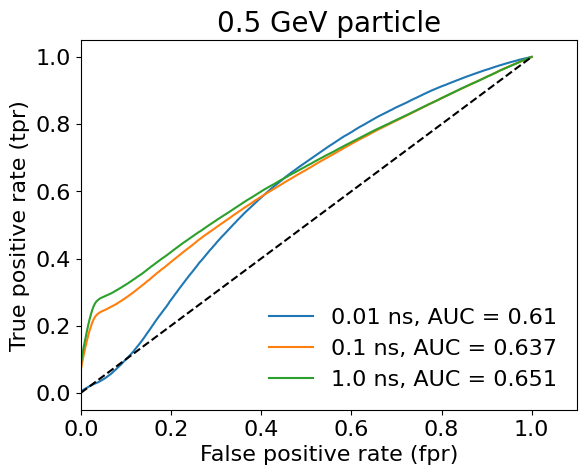

In [26]:
label_str = ["0.01 ns", "0.1 ns", "1.0 ns"]
color = ['orange','g','r']
for i in range(3):
    roc_curve = np.array(roc[i])
    tpr = roc_curve[:,0]
    fpr = roc_curve[:,1]
    auc = metrics.auc(fpr, tpr)
    print("AUC = ", auc)
    label = label_str[i] + ", AUC = "+ str(round(auc,3))
    _ = plt.plot(fpr,tpr, label=label)
    plt.xlabel('False positive rate (fpr)', fontsize=16)
    plt.ylabel('True positive rate (tpr)', fontsize=16)
    plt.legend(fontsize=16,frameon=False)
    plt.title('0.5 GeV particle', fontsize=20)
    plt.tick_params(axis='both', which='major', labelsize=16)
    plt.xlim([0,1.1])
plt.plot(x,y,linestyle="--", c='k')

R30 =  4.7
R30 =  8.5
R30 =  13.9


/tmp/ipykernel_357572/1481324141.py:12: RuntimeWarning: divide by zero encountered in divide
  _ = plt.plot(tpr, 1/fpr, label=label,c = color[i])


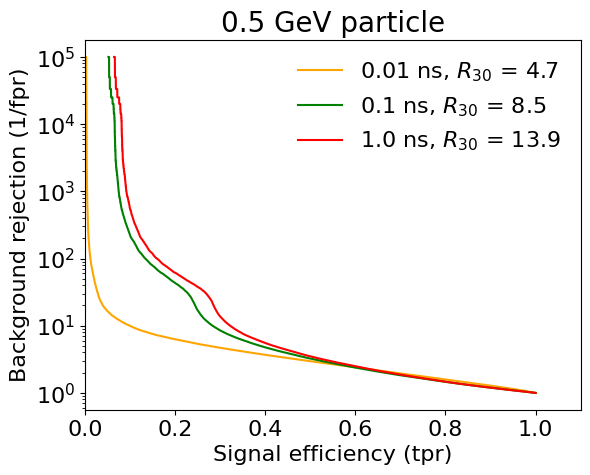

In [27]:
label_str = ["0.01 ns", "0.1 ns", "1.0 ns"]
color = ['orange','g','r']
for i in range(3):
    roc_curve = np.array(roc[i])
    tpr = roc_curve[:,0]
    fpr = roc_curve[:,1]
    #auc = metrics.auc(fpr, tpr)
    fpr_30 = fpr[np.argmin(np.abs(tpr-0.3))]
    R30 = 1/fpr_30
    print("R30 = ", str(round(R30,1)))
    label = label_str[i] + r", $R_{30}$ = "+str(round(R30,1))
    _ = plt.plot(tpr, 1/fpr, label=label,c = color[i])
    plt.ylabel('Background rejection (1/fpr)', fontsize=16)
    plt.xlabel('Signal efficiency (tpr)', fontsize=16)
    plt.legend(fontsize=16,frameon=False)
    plt.title('0.5 GeV particle', fontsize=20)
    plt.tick_params(axis='both', which='major', labelsize=16)
    plt.yscale('log')
    plt.xlim([0,1.1])

/tmp/ipykernel_357572/1502957222.py:11: RuntimeWarning: divide by zero encountered in divide
  _ = plt.plot(tpr, tpr/np.sqrt(fpr), label=label, c = color[i])
/tmp/ipykernel_357572/1502957222.py:11: RuntimeWarning: invalid value encountered in divide
  _ = plt.plot(tpr, tpr/np.sqrt(fpr), label=label, c = color[i])


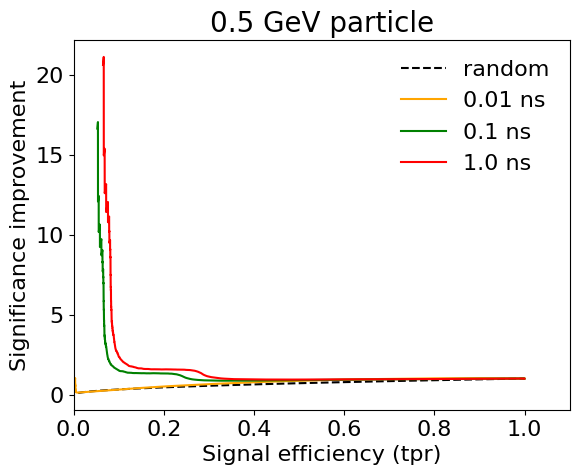

In [28]:
label_str = ["0.01 ns", "0.1 ns", "1.0 ns"]
color = ['orange','g','r']

x = np.linspace(0.01,1,100)
_ = plt.plot(x, x/np.sqrt(x), label="random", c = 'k', linestyle = '--') 
for i in range(3):
    roc_curve = np.array(roc[i])
    tpr = roc_curve[:,0]
    fpr = roc_curve[:,1]
    label = label_str[i]
    _ = plt.plot(tpr, tpr/np.sqrt(fpr), label=label, c = color[i])
    plt.ylabel('Significance improvement', fontsize=16)
    plt.xlabel('Signal efficiency (tpr)', fontsize=16)
    plt.legend(fontsize=16,frameon=False)
    plt.title('0.5 GeV particle', fontsize=20)
    plt.tick_params(axis='both', which='major', labelsize=16)
    plt.xlim([0,1.1])    

/tmp/ipykernel_357572/1435060725.py:11: RuntimeWarning: divide by zero encountered in divide
  _ = plt.plot(1/fpr, tpr/np.sqrt(fpr), label=label, c = color[i])
/tmp/ipykernel_357572/1435060725.py:11: RuntimeWarning: invalid value encountered in divide
  _ = plt.plot(1/fpr, tpr/np.sqrt(fpr), label=label, c = color[i])


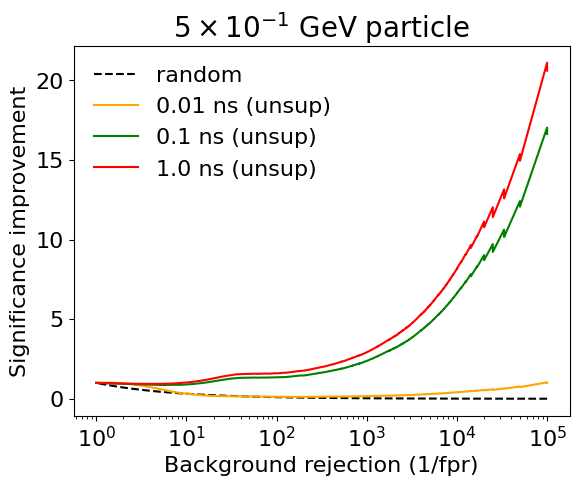

In [29]:
label_str = ["0.01 ns (unsup)", "0.1 ns (unsup)", "1.0 ns (unsup)"]
#label_str_sup = ["0.01 ns (sup)", "0.1 ns (sup)", "1.0 ns (sup)"]
color = ['orange','g','r']
x = np.logspace(-5,0,100)
_ = plt.plot(1/x, x/np.sqrt(x), label="random", c = 'k', linestyle = '--')
for i in range(3):
    roc_curve = np.array(roc[i])
    tpr = roc_curve[:,0]
    fpr = roc_curve[:,1]
    label = label_str[i]
    _ = plt.plot(1/fpr, tpr/np.sqrt(fpr), label=label, c = color[i])

    #sup = np.loadtxt(supervised[i])
    sup_roc = np.loadtxt(supervised_roc[i])
    label_sup = label_str_sup[i]
    #_ = plt.plot(sup[0,:], sup[1,:], label=label_sup, c = color[i], linestyle='dashdot')
    #_ = plt.plot(1/sup_roc[0,:], sup_roc[1,:]/np.sqrt(sup_roc[0,:]), label=label_sup, c = color[i], linestyle='dotted')
    plt.ylabel('Significance improvement', fontsize=16)
    #plt.xlabel('Signal efficiency (tpr)', fontsize=16)
    plt.xlabel('Background rejection (1/fpr)', fontsize=16)
    plt.legend(fontsize=16,frameon=False)
    plt.title(r'$5\times 10^{-1}$ GeV particle', fontsize=20)
    plt.tick_params(axis='both', which='major', labelsize=16)
    #plt.xlim([0,1.1])
    plt.xscale('log')
    plt.savefig("paper_plots/0_5GeV.png",dpi=300, bbox_inches='tight')

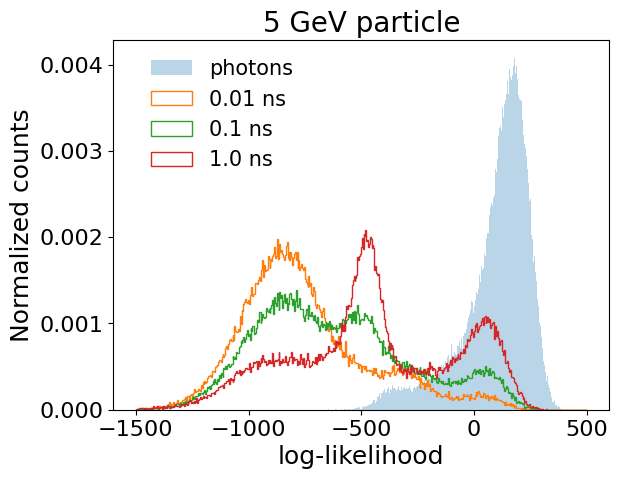

In [30]:
bins = np.linspace(-1500,500,500)
_ = plt.hist(photon_LL,bins=bins,label="photons",density=True,alpha=0.3)
_ = plt.hist(lifetime_0_01ns_5GeV,bins=bins,histtype='step',label="0.01 ns",density=True)
_ = plt.hist(lifetime_0_1ns_5GeV,bins=bins,histtype='step',label="0.1 ns",density=True)
_ = plt.hist(lifetime_1ns_5GeV,bins=bins,histtype='step',label="1.0 ns",density=True)

plt.legend(loc='upper right', bbox_to_anchor=(0.4, 1),
          ncol=1, frameon=False, fontsize=15)
plt.title('5 GeV particle', fontsize=20)
plt.xlabel('log-likelihood',fontsize=18)
plt.ylabel('Normalized counts',fontsize=18)
plt.tick_params(axis='both', which='major', labelsize=16)

In [31]:
roc = {}
for i in range(3):
    roc[i] = []
n = 0
for data in [lifetime_0_01ns_5GeV, lifetime_0_1ns_5GeV,lifetime_1ns_5GeV]:
    for cut in np.linspace(-3500,500,4000):
        passcut_sig =len(data[data<cut])
        passcut_bg =len(photon_LL[photon_LL<cut])
        roc[n].append([passcut_sig/len(data), passcut_bg/100000])
    n += 1

In [32]:
x = [0, 1]
y = [0, 1]

AUC =  0.9849755689000002
AUC =  0.9620031443999999
AUC =  0.9222261748000001


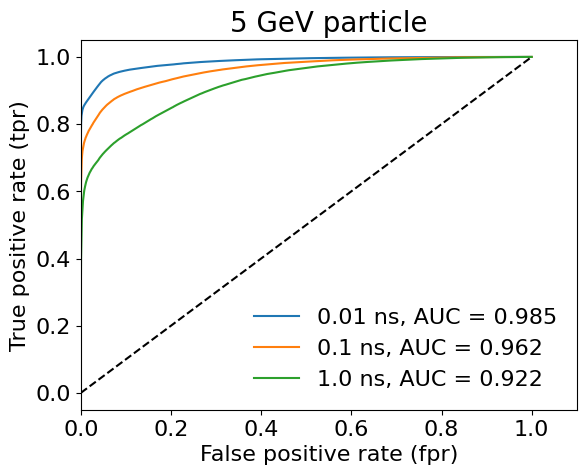

In [33]:
label_str = ["0.01 ns", "0.1 ns", "1.0 ns"]
color = ['orange','g','r']
for i in range(3):
    roc_curve = np.array(roc[i])
    tpr = roc_curve[:,0]
    fpr = roc_curve[:,1]
    auc = metrics.auc(fpr, tpr)
    print("AUC = ", auc)
    label = label_str[i] + ", AUC = "+ str(round(auc,3))
    _ = plt.plot(fpr,tpr, label=label)
    plt.xlabel('False positive rate (fpr)', fontsize=16)
    plt.ylabel('True positive rate (tpr)', fontsize=16)
    plt.legend(fontsize=16,frameon=False)
    plt.title('5 GeV particle', fontsize=20)
    plt.tick_params(axis='both', which='major', labelsize=16)
    plt.xlim([0,1.1])
plt.plot(x,y,linestyle="--", c='k')

R30 =  25000.0
R30 =  14285.7
R30 =  4347.8


/tmp/ipykernel_357572/2540247168.py:12: RuntimeWarning: divide by zero encountered in divide
  _ = plt.plot(tpr, 1/fpr, label=label, c = color[i])


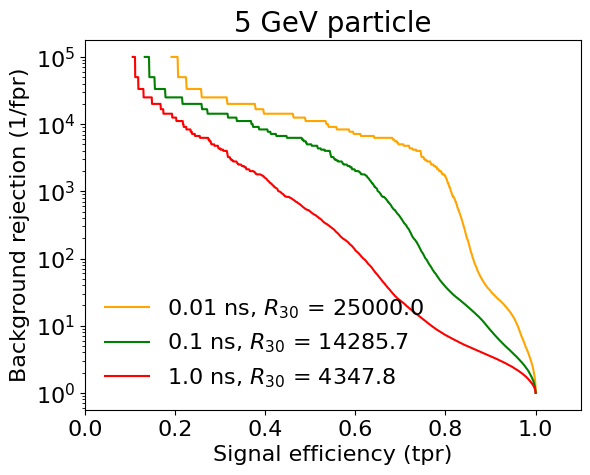

In [34]:
label_str = ["0.01 ns", "0.1 ns", "1.0 ns"]
color = ['orange','g','r']
for i in range(3):
    roc_curve = np.array(roc[i])
    tpr = roc_curve[:,0]
    fpr = roc_curve[:,1]
    #auc = metrics.auc(fpr, tpr)
    fpr_30 = fpr[np.argmin(np.abs(tpr-0.3))]
    R30 = 1/fpr_30
    print("R30 = ", str(round(R30,1)))
    label = label_str[i] + r", $R_{30}$ = "+str(round(R30,1))
    _ = plt.plot(tpr, 1/fpr, label=label, c = color[i])
    plt.ylabel('Background rejection (1/fpr)', fontsize=16)
    plt.xlabel('Signal efficiency (tpr)', fontsize=16)
    plt.legend(fontsize=16,frameon=False)
    plt.title('5 GeV particle', fontsize=20)
    plt.tick_params(axis='both', which='major', labelsize=16)
    plt.yscale('log')
    plt.xlim([0,1.1])

/tmp/ipykernel_357572/440546221.py:10: RuntimeWarning: divide by zero encountered in divide
  _ = plt.plot(tpr, tpr/np.sqrt(fpr), label=label, c = color[i])
/tmp/ipykernel_357572/440546221.py:10: RuntimeWarning: invalid value encountered in divide
  _ = plt.plot(tpr, tpr/np.sqrt(fpr), label=label, c = color[i])


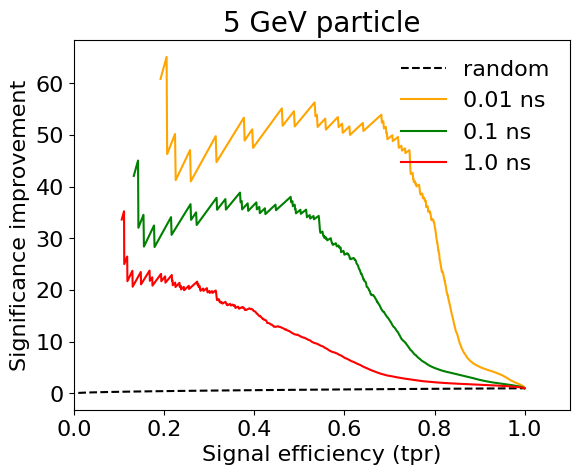

In [35]:
label_str = ["0.01 ns", "0.1 ns", "1.0 ns"]
color = ['orange','g','r']
x = np.linspace(0.01,1,100)
_ = plt.plot(x, x/np.sqrt(x), label="random", c = 'k', linestyle = '--')
for i in range(3):
    roc_curve = np.array(roc[i])
    tpr = roc_curve[:,0]
    fpr = roc_curve[:,1]
    label = label_str[i]
    _ = plt.plot(tpr, tpr/np.sqrt(fpr), label=label, c = color[i])
    plt.ylabel('Significance improvement', fontsize=16)
    plt.xlabel('Signal efficiency (tpr)', fontsize=16)
    plt.legend(fontsize=16,frameon=False)
    plt.title('5 GeV particle', fontsize=20)
    plt.tick_params(axis='both', which='major', labelsize=16)
    plt.xlim([0,1.1])

/tmp/ipykernel_357572/2719699810.py:13: RuntimeWarning: divide by zero encountered in divide
  _ = plt.plot(1/fpr, tpr/np.sqrt(fpr), label=label, c = color[i])
/tmp/ipykernel_357572/2719699810.py:13: RuntimeWarning: invalid value encountered in divide
  _ = plt.plot(1/fpr, tpr/np.sqrt(fpr), label=label, c = color[i])


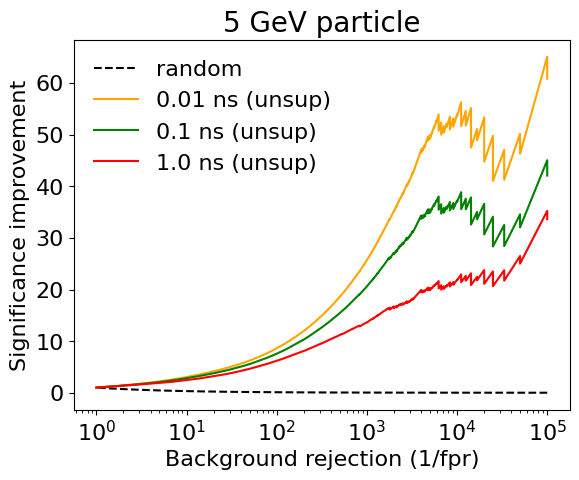

In [36]:
#supervised_roc  = ["lifetime_0.01ns_5GeV_roc.txt", "lifetime_0.1ns_5GeV_roc.txt", "lifetime_1ns_5GeV_roc.txt"]

label_str = ["0.01 ns (unsup)", "0.1 ns (unsup)", "1.0 ns (unsup)"]
label_str_sup = ["0.01 ns (sup)", "0.1 ns (sup)", "1.0 ns (sup)"]
color = ['orange','g','r']
x = np.logspace(-5,0,100)
_ = plt.plot(1/x, x/np.sqrt(x), label="random", c = 'k', linestyle = '--')
for i in range(3):
    roc_curve = np.array(roc[i])
    tpr = roc_curve[:,0]
    fpr = roc_curve[:,1]
    label = label_str[i]
    _ = plt.plot(1/fpr, tpr/np.sqrt(fpr), label=label, c = color[i])

    #sup = np.loadtxt(supervised[i])
    sup_roc = np.loadtxt(supervised_roc[i])
    label_sup = label_str_sup[i]
    #_ = plt.plot(sup[0,:], sup[1,:], label=label_sup, c = color[i], linestyle='dashdot')
    #_ = plt.plot(1/sup_roc[0,:], sup_roc[1,:]/np.sqrt(sup_roc[0,:]), label=label_sup, c = color[i], linestyle='dotted')
    plt.ylabel('Significance improvement', fontsize=16)
    #plt.xlabel('Signal efficiency (tpr)', fontsize=16)
    plt.xlabel('Background rejection (1/fpr)', fontsize=16)
    plt.legend(fontsize=16,frameon=False)
    plt.title(r'5 GeV particle', fontsize=20)
    plt.tick_params(axis='both', which='major', labelsize=16)
    #plt.xlim([0,1.1])
    plt.xscale('log')
    plt.savefig("paper_plots/5GeV.png",dpi=300, bbox_inches='tight')

/tmp/ipykernel_357572/3528153619.py:14: RuntimeWarning: divide by zero encountered in divide
  _ = plt.plot(1/fpr, tpr/np.sqrt(fpr), label=label, c = color[i])
/tmp/ipykernel_357572/3528153619.py:14: RuntimeWarning: invalid value encountered in divide
  _ = plt.plot(1/fpr, tpr/np.sqrt(fpr), label=label, c = color[i])
/tmp/ipykernel_357572/3528153619.py:20: RuntimeWarning: divide by zero encountered in divide
  _ = plt.plot(1/sup_roc[0,:], sup_roc[1,:]/np.sqrt(sup_roc[0,:]), label=label_sup, c = color[i], linestyle='dotted')
/tmp/ipykernel_357572/3528153619.py:20: RuntimeWarning: invalid value encountered in divide
  _ = plt.plot(1/sup_roc[0,:], sup_roc[1,:]/np.sqrt(sup_roc[0,:]), label=label_sup, c = color[i], linestyle='dotted')


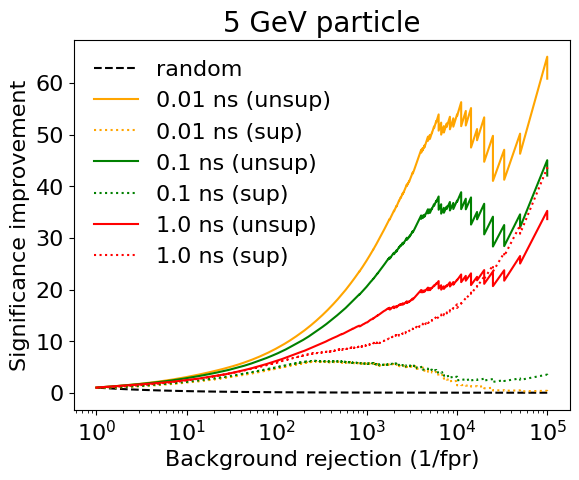

In [37]:
#supervised  = ["lifetime_0.01ns_0.005GeV_sic.txt", "lifetime_0.1ns_0.005GeV_sic.txt", "lifetime_1ns_0.005GeV_sic.txt"]
supervised_roc  = ["lifetime_0.01ns_5GeV_roc.txt", "lifetime_0.1ns_5GeV_roc.txt", "lifetime_1ns_5GeV_roc.txt"]

label_str = ["0.01 ns (unsup)", "0.1 ns (unsup)", "1.0 ns (unsup)"]
label_str_sup = ["0.01 ns (sup)", "0.1 ns (sup)", "1.0 ns (sup)"]
color = ['orange','g','r']
x = np.logspace(-5,0,100)
_ = plt.plot(1/x, x/np.sqrt(x), label="random", c = 'k', linestyle = '--')
for i in range(3):
    roc_curve = np.array(roc[i])
    tpr = roc_curve[:,0]
    fpr = roc_curve[:,1]
    label = label_str[i]
    _ = plt.plot(1/fpr, tpr/np.sqrt(fpr), label=label, c = color[i])

    #sup = np.loadtxt(supervised[i])
    sup_roc = np.loadtxt(supervised_roc[i])
    label_sup = label_str_sup[i]
    #_ = plt.plot(sup[0,:], sup[1,:], label=label_sup, c = color[i], linestyle='dashdot')
    _ = plt.plot(1/sup_roc[0,:], sup_roc[1,:]/np.sqrt(sup_roc[0,:]), label=label_sup, c = color[i], linestyle='dotted')
    plt.ylabel('Significance improvement', fontsize=16)
    #plt.xlabel('Signal efficiency (tpr)', fontsize=16)
    plt.xlabel('Background rejection (1/fpr)', fontsize=16)
    plt.legend(fontsize=16,frameon=False)
    plt.title(r'5 GeV particle', fontsize=20)
    plt.tick_params(axis='both', which='major', labelsize=16)
    #plt.xlim([0,1.1])
    plt.xscale('log')
    plt.savefig("paper_plots/5GeV_sup.png",dpi=300, bbox_inches='tight')

/tmp/ipykernel_357572/3308850415.py:14: RuntimeWarning: divide by zero encountered in divide
  _ = plt.plot(1/fpr, tpr/np.sqrt(fpr), label=label, c = color[i])
/tmp/ipykernel_357572/3308850415.py:14: RuntimeWarning: invalid value encountered in divide
  _ = plt.plot(1/fpr, tpr/np.sqrt(fpr), label=label, c = color[i])
/tmp/ipykernel_357572/3308850415.py:20: RuntimeWarning: divide by zero encountered in divide
  _ = plt.plot(1/sup_roc[0,:], sup_roc[1,:]/np.sqrt(sup_roc[0,:]), label=label_sup, c = color[i], linestyle='dotted')
/tmp/ipykernel_357572/3308850415.py:20: RuntimeWarning: invalid value encountered in divide
  _ = plt.plot(1/sup_roc[0,:], sup_roc[1,:]/np.sqrt(sup_roc[0,:]), label=label_sup, c = color[i], linestyle='dotted')


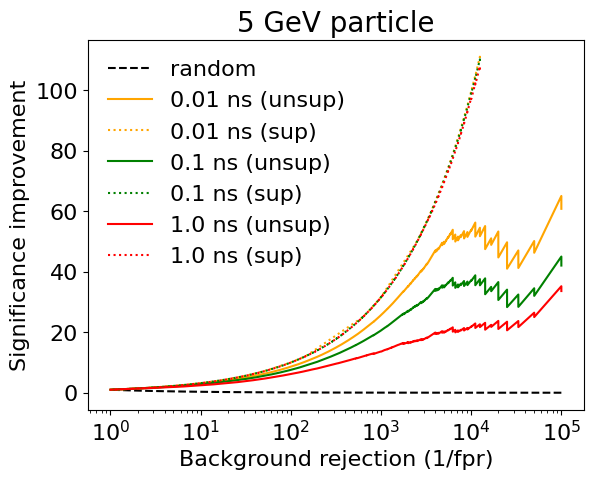

In [38]:
#supervised  = ["lifetime_0.01ns_0.005GeV_sic.txt", "lifetime_0.1ns_0.005GeV_sic.txt", "lifetime_1ns_0.005GeV_sic.txt"]
supervised_heavy_roc  = ["lifetime_0.01ns_5GeV_heavy_roc.txt", "lifetime_0.1ns_5GeV_heavy_roc.txt", "lifetime_1ns_5GeV_heavy_roc.txt"]

label_str = ["0.01 ns (unsup)", "0.1 ns (unsup)", "1.0 ns (unsup)"]
label_str_sup = ["0.01 ns (sup)", "0.1 ns (sup)", "1.0 ns (sup)"]
color = ['orange','g','r']
x = np.logspace(-5,0,100)
_ = plt.plot(1/x, x/np.sqrt(x), label="random", c = 'k', linestyle = '--')
for i in range(3):
    roc_curve = np.array(roc[i])
    tpr = roc_curve[:,0]
    fpr = roc_curve[:,1]
    label = label_str[i]
    _ = plt.plot(1/fpr, tpr/np.sqrt(fpr), label=label, c = color[i])

    #sup = np.loadtxt(supervised[i])
    sup_roc = np.loadtxt(supervised_heavy_roc[i])
    label_sup = label_str_sup[i]
    #_ = plt.plot(sup[0,:], sup[1,:], label=label_sup, c = color[i], linestyle='dashdot')
    _ = plt.plot(1/sup_roc[0,:], sup_roc[1,:]/np.sqrt(sup_roc[0,:]), label=label_sup, c = color[i], linestyle='dotted')
    plt.ylabel('Significance improvement', fontsize=16)
    #plt.xlabel('Signal efficiency (tpr)', fontsize=16)
    plt.xlabel('Background rejection (1/fpr)', fontsize=16)
    plt.legend(fontsize=16,frameon=False)
    plt.title(r'5 GeV particle', fontsize=20)
    plt.tick_params(axis='both', which='major', labelsize=16)
    plt.xscale('log')
    plt.savefig("paper_plots/5GeV_heavy_sup.png",dpi=300, bbox_inches='tight')